In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#Exploring the data
#Defining file paths
train_file_path = '/kaggle/input/titanic/train.csv'
test_file_path = '/kaggle/input/titanic/test.csv'
gender_submission_file_path = '/kaggle/input/titanic/gender_submission.csv'

#Loading the data
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)
gender_submission_data = pd.read_csv(gender_submission_file_path)

#Checking the first few rows of the train data
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()
train_data.shape
train_data.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
#Identifying Missing Values 
num_nan = train_data["Cabin"].isna().sum() #By the looks, Cabin seems to have a lot of missing values 
print(num_nan)

687


In [6]:
#Dropping the 'Cabin', 'Passengerid' & 'Ticket' column
train_data.drop(labels="Cabin", axis=1, inplace=True)
train_data.drop(labels="PassengerId", axis=1, inplace=True)
train_data.drop(labels="Ticket", axis=1, inplace=True)
test_data.drop(labels="Cabin", axis=1, inplace=True)
test_data.drop(labels="PassengerId", axis=1, inplace=True)
test_data.drop(labels="Ticket", axis=1, inplace=True)

#Storing the values of mean and median from training data to fill in for test data
median_fare = train_data["Fare"].median()
mean_age = train_data["Age"].mean()

#Imputing the 'Age' column's missing values with mean 
if "Age" in train_data:
    train_data["Age"] = train_data["Age"].fillna(mean_age)
    
#Imputing the 'Fare' column's missing values with median fare
if "Fare" in train_data:
    train_data["Fare"] = train_data["Fare"].fillna(median_fare)

#Doing the same for test set
test_data["Age"] = test_data["Age"].fillna(mean_age) 
test_data["Fare"] = test_data["Fare"].fillna(median_fare)


In [7]:
#Checking how many missing values there are
print(train_data['Embarked'].isnull().sum())


2


In [8]:
#Combining/Creating new Title Features 
# Creating a function to grab titles 
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    return ""

#Applying get_title to the 'Name' column + create a new 'Title' column
train_data['Title'] = train_data['Name'].apply(get_title)
test_data['Title'] = test_data['Name'].apply(get_title)

#Reducing dimensions by grouping less common titles into an 'Other' category
title_counts = train_data['Title'].value_counts()
less_common_titles = title_counts[title_counts < 10].index  # Titles with less than 10 occurrences
train_data['Title'] = train_data['Title'].replace(less_common_titles, 'Other')
test_data['Title'] = test_data['Title'].replace(less_common_titles, 'Other')

#Dropping the 'Name' column now as not seeing it necessary 
train_data.drop(labels="Name", axis=1, inplace=True)
test_data.drop(labels="Name", axis=1, inplace=True)

In [9]:
#Checking the distribution of titles 
num_of_dr = 0
num_of_master = 0
num_of_rev = 0
num_of_miss = 0
num_of_mr = 0
num_of_msr = 0

for i in train_data["Title"]:
    if 'Dr' in i:
        num_of_dr += 1
    elif 'Master' in i:
        num_of_master += 1
    elif 'Rev' in i:
        num_of_rev += 1
    elif 'Miss' in i:
        num_of_miss += 1
    elif 'Mr' in i:
        num_of_mr += 1
    elif 'Mrs' in i:
        num_of_msr += 1
print(f'number of dr: {num_of_dr}, number of master: {num_of_master}, number of rev: {num_of_rev}, number of miss: {num_of_miss}, number of mr: {num_of_mr}, number of msr: {num_of_msr}')


number of dr: 0, number of master: 40, number of rev: 0, number of miss: 182, number of mr: 642, number of msr: 0


In [10]:
#Combining 'Title' and 'Pclass' into 1 feature Title_Pclass
train_data['Title_Pclass'] = train_data['Title'] + "_" + train_data['Pclass'].astype(str)

#Doing the same for the test_data
test_data['Title_Pclass'] = test_data['Title'] + "_" + test_data['Pclass'].astype(str)


In [11]:
#Combining 'Parch' and 'SibSp' to create 1 feature; Fam_size
train_data['Fam_size'] = train_data['Parch'] + train_data['SibSp'] + 1 #+1 includes passenger themsef

#Doing the same for the test dataset
test_data['Fam_size'] = test_data['Parch'] + test_data['SibSp'] + 1


vv Tweak this vv

In [12]:
#Defining age categories
age_categories = {
    'infant': (0, 1),
    'toddler': (2, 4),
    'child': (5, 12),
    'teen': (13, 19),
    'adult': (20, 39),
    'middle_age_adult': (40, 59),
    'senior_adult': (60, 110)  # Assuming 110 as an upper limit for demonstration
}

#Function to categorize age
def categorize_age(age):
    for category, (start, end) in age_categories.items():
        if start <= age <= end:
            return category
    return 'unknown'  # For ages outside defined ranges

#Applying categorization
train_data['Age_Category'] = train_data['Age'].apply(categorize_age)
test_data['Age_Category'] = test_data['Age'].apply(categorize_age)

print(train_data)

     Survived  Pclass     Sex        Age  SibSp  Parch     Fare Embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

     Title Title_Pclass  Fam_size Age_Category  
0       Mr         Mr_3         2     

In [13]:
fare_summary = train_data['Fare'].describe()
print(fare_summary)

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


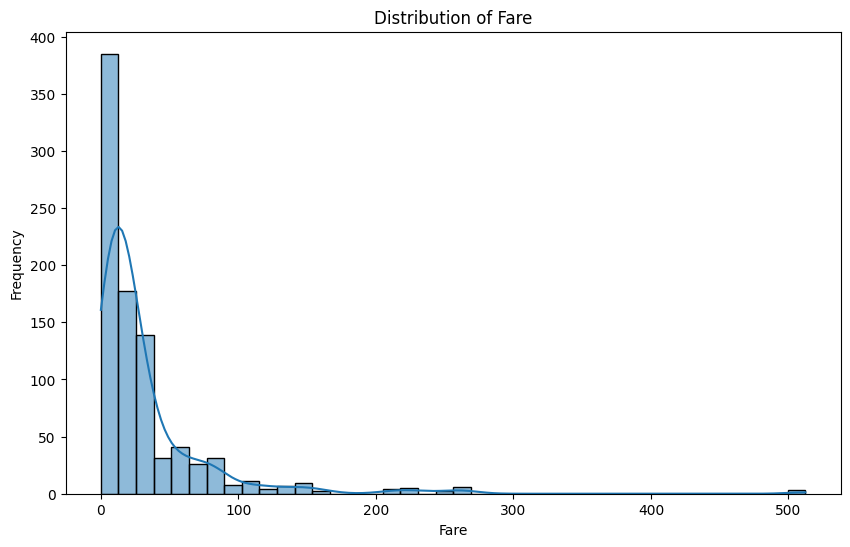

Fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: count, Length: 248, dtype: int64


In [14]:
#Looking at distribution for 'fare'
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Fare'], kde=True, bins=40)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


fare_counts = train_data['Fare'].value_counts().sort_index()
print(fare_counts)


In [15]:
#quantile-binning for 'fare'
train_data['FareGroup'] = pd.qcut(train_data['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
test_data['FareGroup'] = pd.qcut(train_data['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [16]:
#One hot encoding 
categorical_features = ['Sex', 'Embarked', 'Title', 'Title_Pclass', 'Age_Category', 'FareGroup']
train_data = pd.get_dummies(train_data, columns=categorical_features, drop_first=True)
test_data = pd.get_dummies(test_data, columns=categorical_features, drop_first=True)

#Creating X and Y
X = train_data.drop(['Survived'], axis=1) 
y = train_data['Survived']

# Exclude the 'Survived' column or any other columns not present in test_data
columns_for_test = [col for col in train_data.columns if col != 'Survived']

#No Y_test needed | Creating 'X_test'
X_test = test_data.reindex(columns=columns_for_test, fill_value=0)

In [17]:
#Prepping data
X_train = train_data.drop(['Survived'], axis=1) 
y_train = train_data['Survived']

#Splitting the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=4000,random_state=50))
])

#Fitting pipeline to training data 
pipeline.fit(X_train,y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=4000, random_state=50))])

In [18]:
#Predicting on the validation set
y_pred = pipeline.predict(X_val)

#Calculating the accuracy
val_accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {val_accuracy}')

#Printing the classification report
print(classification_report(y_val, y_pred))

#Printing the confusion matrix
print(confusion_matrix(y_val, y_pred))


Validation Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

[[93 12]
 [24 50]]


In [19]:
#Accessing the logistic regression model's coefficients
logistic_regression_model = pipeline.named_steps['model']  # 'model' is the name we gave the logistic regression step
coefficients = logistic_regression_model.coef_[0]

#Creating a DataFrame for feature importance
feature_importance = pd.DataFrame(coefficients, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

print(feature_importance)

                               importance
Title_Pclass_Master_2            0.471467
Age_Category_infant              0.328994
Title_Pclass_Mrs_2               0.286230
Title_Pclass_Miss_2              0.262432
FareGroup_Very High              0.238038
Fare                             0.185948
FareGroup_High                   0.160613
Age_Category_toddler             0.154872
Title_Pclass_Master_3            0.136032
Age                              0.103975
FareGroup_Medium                 0.088714
Age_Category_child               0.077491
Title_Mrs                        0.041280
Title_Pclass_Mrs_1               0.017067
Age_Category_teen               -0.001079
Embarked_Q                      -0.009924
Title_Pclass_Other_1            -0.030905
Title_Pclass_Miss_1             -0.045868
Age_Category_senior_adult       -0.070964
Title_Other                     -0.120545
Title_Pclass_Mr_3               -0.150360
Title_Pclass_Other_2            -0.163217
Parch                           -0

In [20]:
#Only including features above the .05 importance threshold
important_features = feature_importance[abs(feature_importance['importance']) > 0.08].index.tolist()
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]
X_val_important = X_val[important_features]

#Retrain model 
pipeline.fit(X_train_important, y_train)



Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=4000, random_state=50))])

In [21]:
#Cross validation with refined model
y_test_pred = pipeline.predict(X_val_important)

#Calculating the accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_test_pred)
print(f'Validation Accuracy: {val_accuracy}')

#Printing the classification report for the validation set
print(classification_report(y_val, y_test_pred))

#Printing the confusion matrix for the validation set
print(confusion_matrix(y_val, y_test_pred))

Validation Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

[[92 13]
 [23 51]]


In [22]:
#Confirming the important features did change/do what it was suppose to 

newcoefficients = pipeline.named_steps['model'].coef_[0]

newfeature_importance = pd.DataFrame(newcoefficients, index=X_train_important.columns, columns=['importance']).sort_values('importance', ascending=False)
print(newfeature_importance)

                               importance
Title_Pclass_Master_2            0.473215
Title_Pclass_Miss_2              0.303931
Age_Category_infant              0.285464
Title_Pclass_Mrs_2               0.275153
FareGroup_Very High              0.251115
Fare                             0.182394
FareGroup_High                   0.176649
Title_Pclass_Master_3            0.138855
Age_Category_toddler             0.099809
FareGroup_Medium                 0.093963
Age                             -0.007549
Title_Pclass_Other_2            -0.140723
Title_Pclass_Mr_3               -0.171658
Title_Other                     -0.175885
Parch                           -0.195357
Embarked_S                      -0.223464
Age_Category_middle_age_adult   -0.234893
Title_Pclass_Mrs_3              -0.240464
Title_Pclass_Mr_1               -0.240838
Fam_size                        -0.355365
Title_Miss                      -0.369573
SibSp                           -0.376786
Title_Pclass_Miss_3             -0

In [23]:
#Accuracy score stayed at .80 after removing features with accuracy scores below abs(.08) 

In [24]:
#Creating submission file
#Re-importing the test data
test_data_with_id = pd.read_csv('/kaggle/input/titanic/test.csv')

#Getting Predictions for submission file
predictions = pipeline.predict(X_test_important)

output = pd.DataFrame({'PassengerId': test_data_with_id['PassengerId'], 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
